In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_spot = pd.read_csv('D:/DOCUMENT/Data Science/Personaldata/Spotify/!9000 popularity classification/19000-spotify-songs/song_data.csv')

In [3]:
data_spot.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [4]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [5]:
check_missing_data(data_spot)

False

In [6]:
data = data_spot.drop("song_name",axis = 1)

# EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


In [8]:
data.nunique()

song_popularity       101
song_duration_ms    11771
acousticness         3209
danceability          849
energy               1132
instrumentalness     3925
key                    12
liveness             1425
loudness             8416
audio_mode              2
speechiness          1224
tempo               12112
time_signature          5
audio_valence        1246
dtype: int64

In [9]:
data['sentiment'] = [1 if i>0.5 else 0 for i in data.audio_valence]

In [10]:
data['sentiment'].value_counts()

1    10102
0     8733
Name: sentiment, dtype: int64

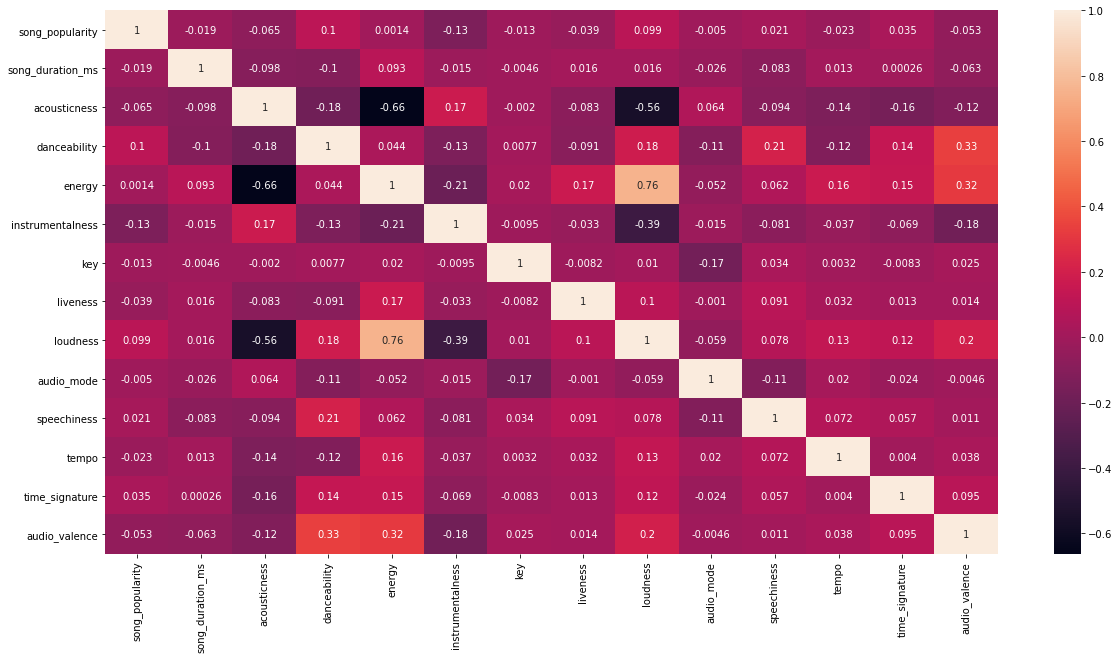

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(data.drop(['sentiment'],axis=1).corr(),annot = True)

Since Energy and Loudness Shows great correlation,I will drop loudness to prevent any kind of over fitting

In [12]:
data = data.drop('loudness',axis=1)

In [13]:
data_col = data.drop(['sentiment'],axis=1).columns
data_col

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence'],
      dtype='object')

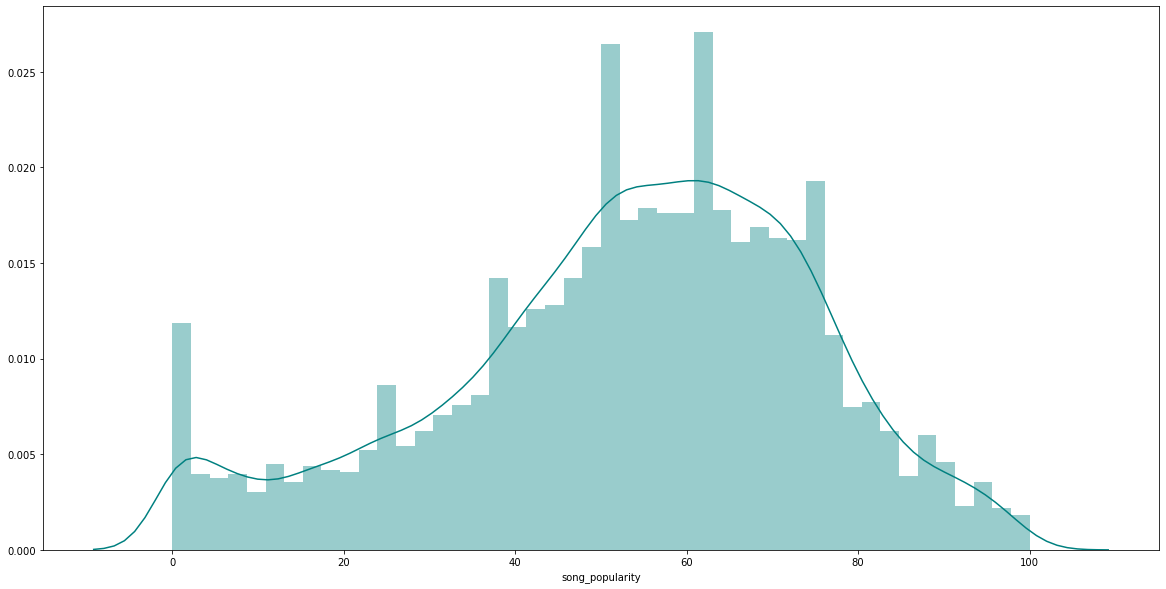

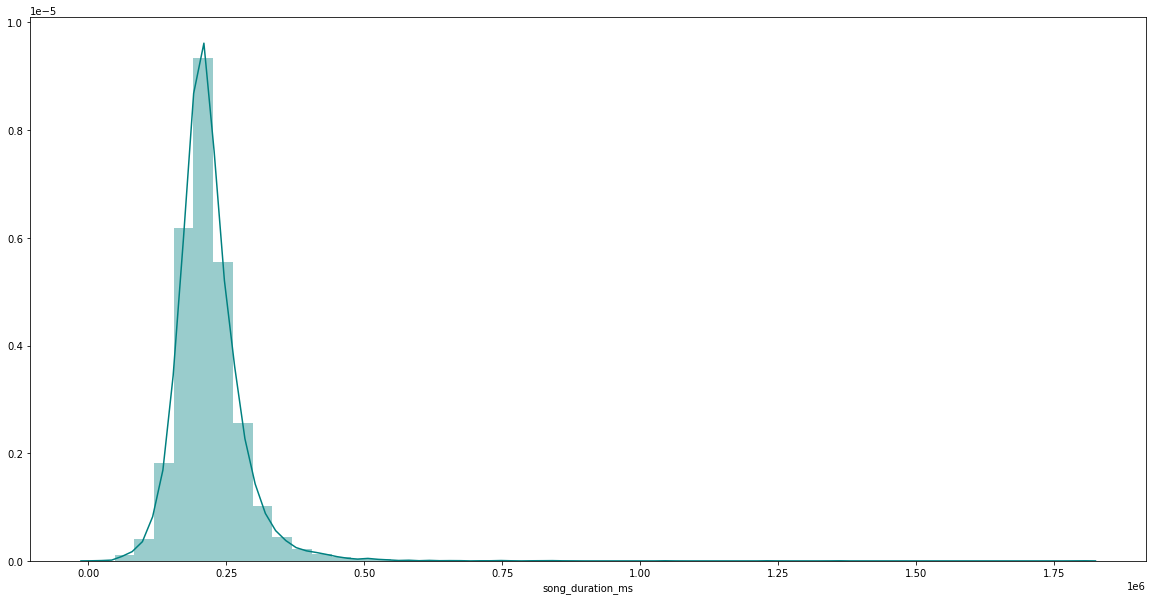

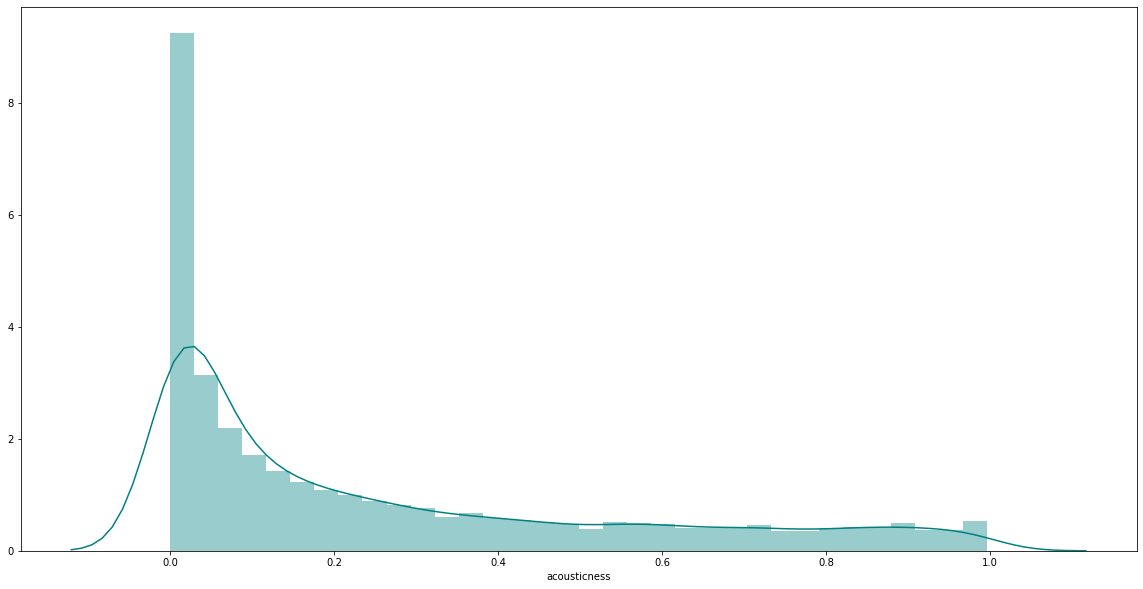

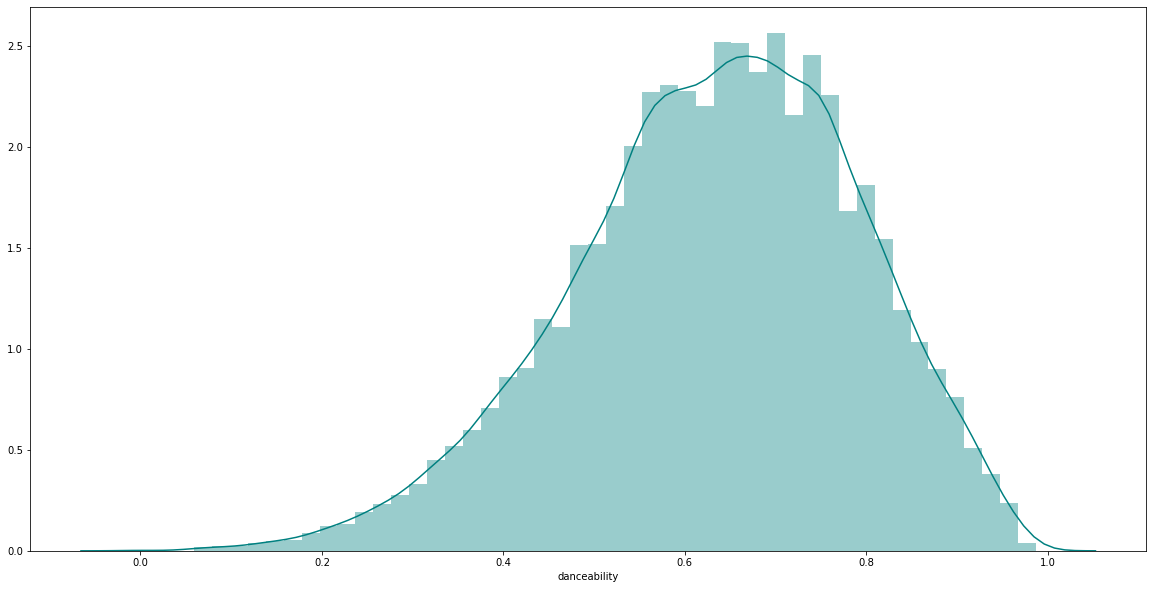

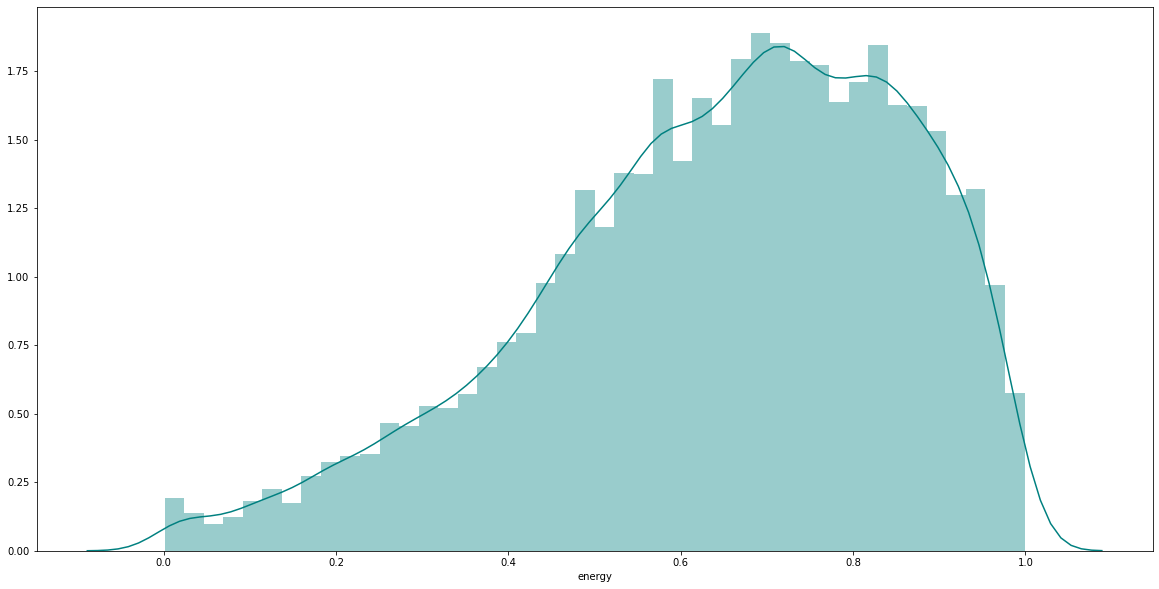

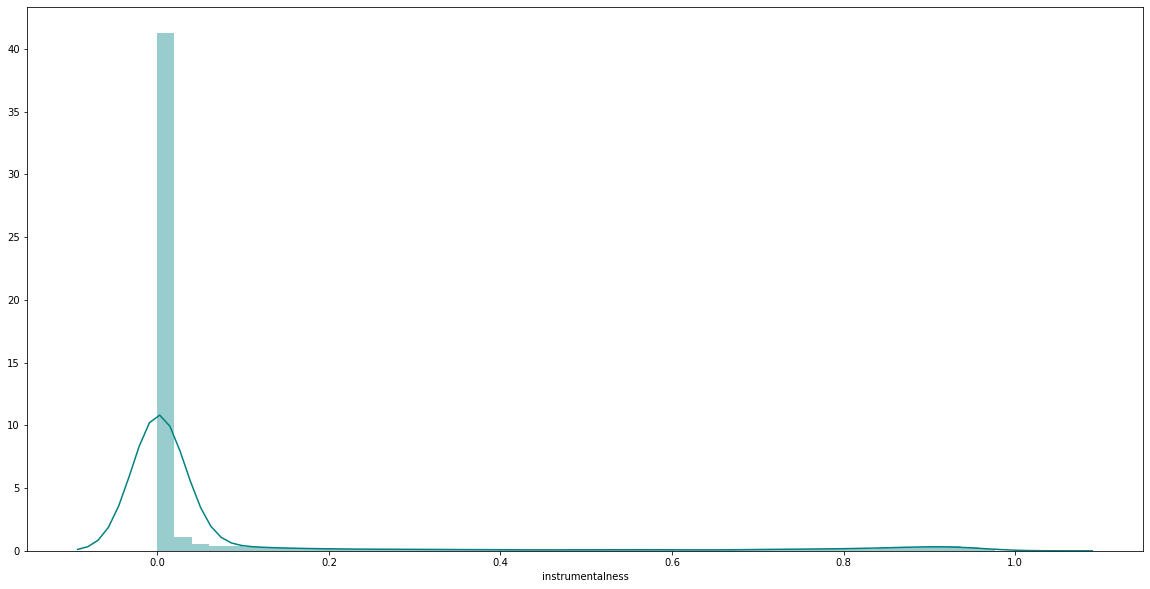

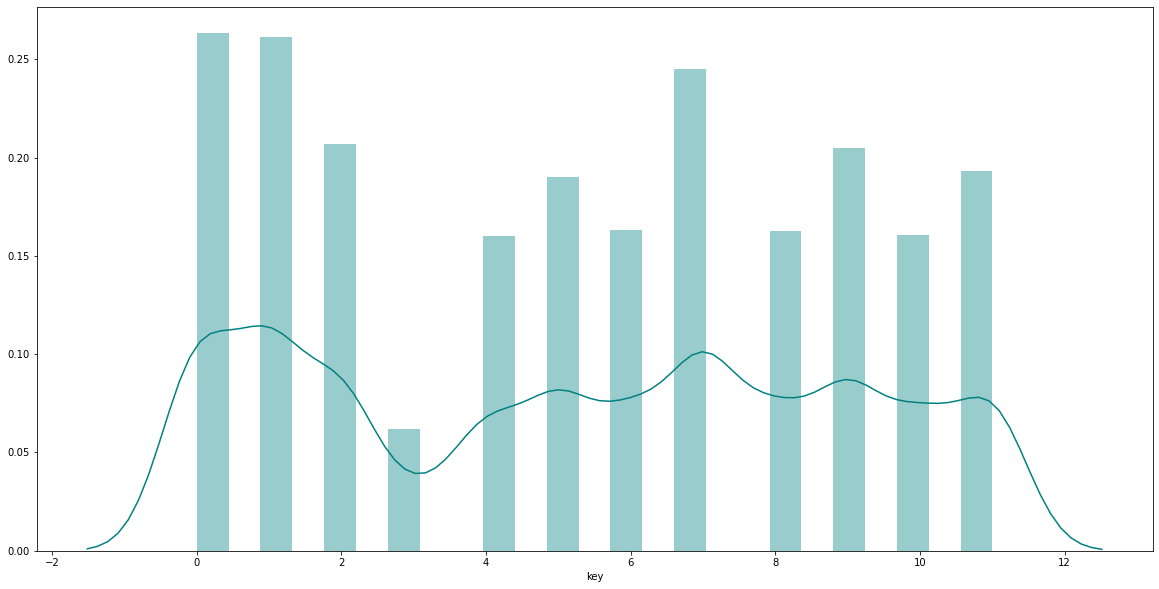

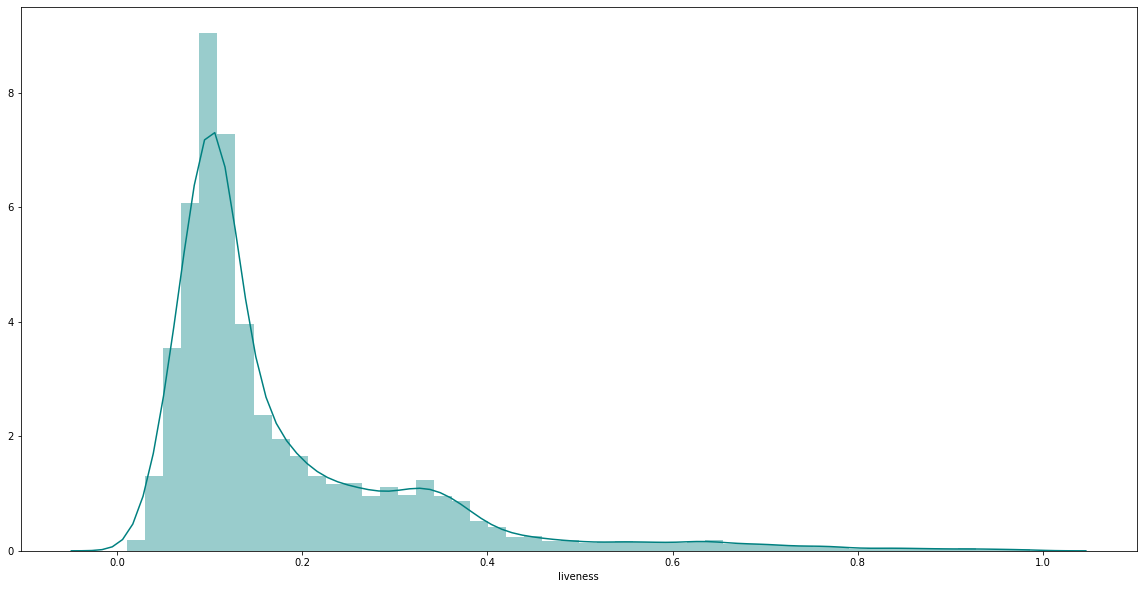

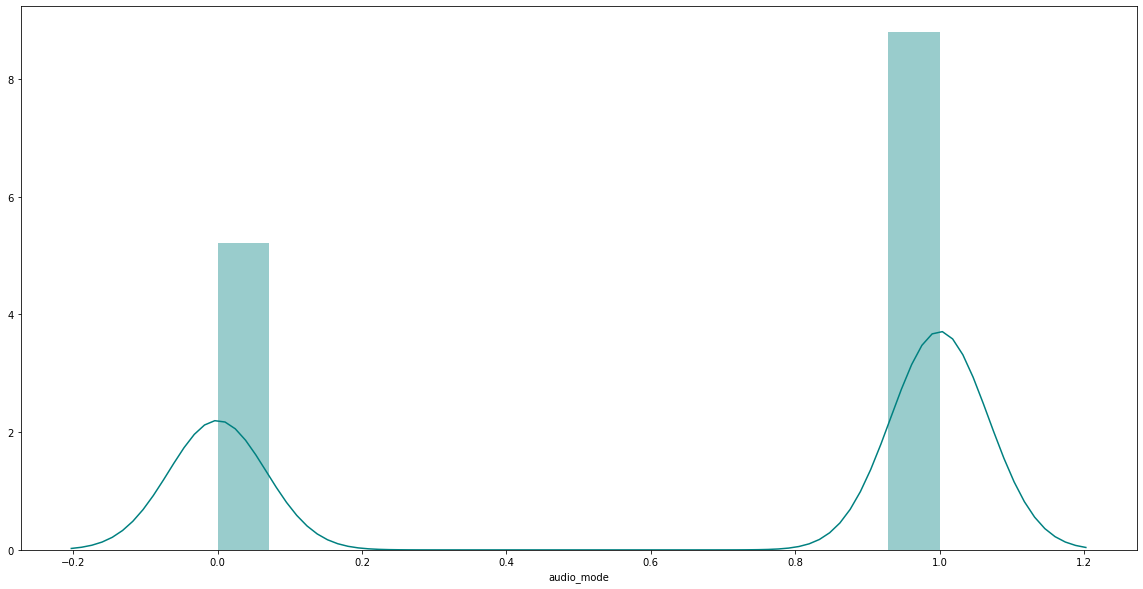

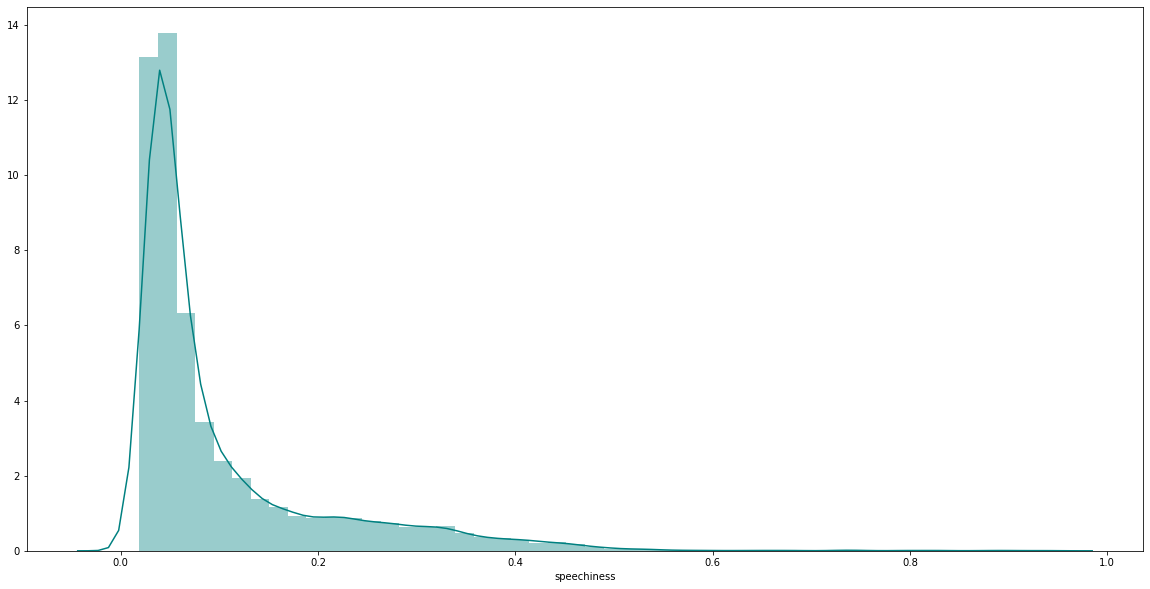

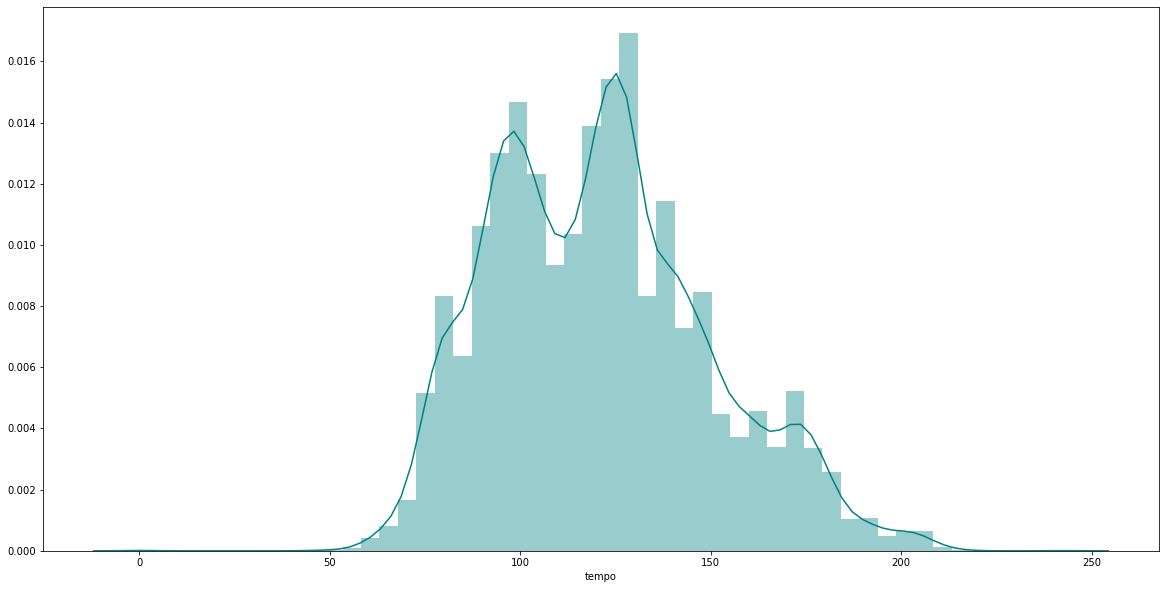

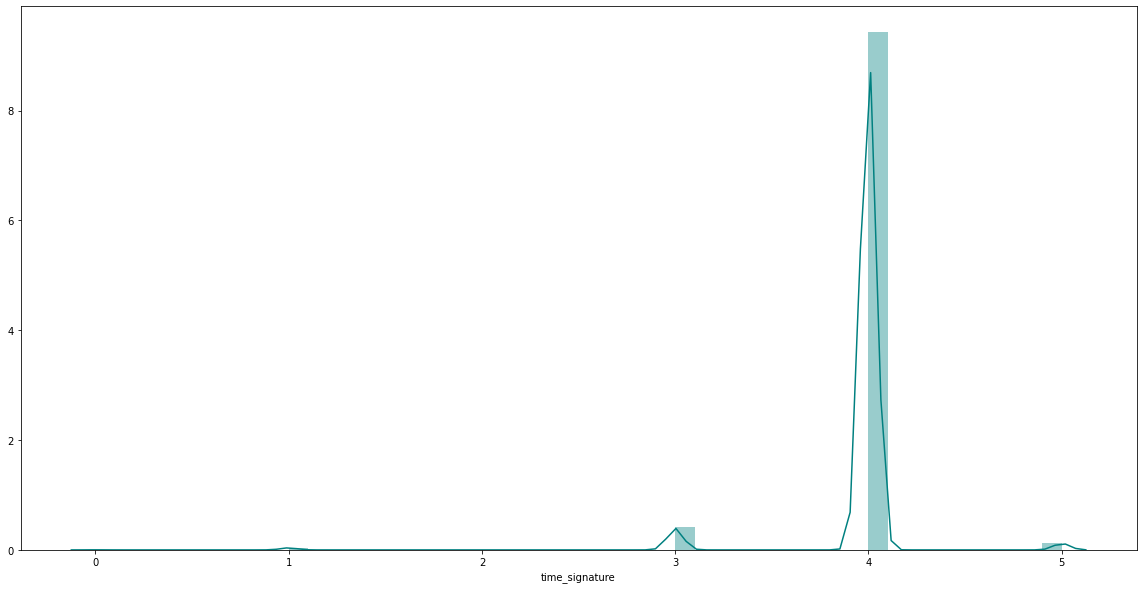

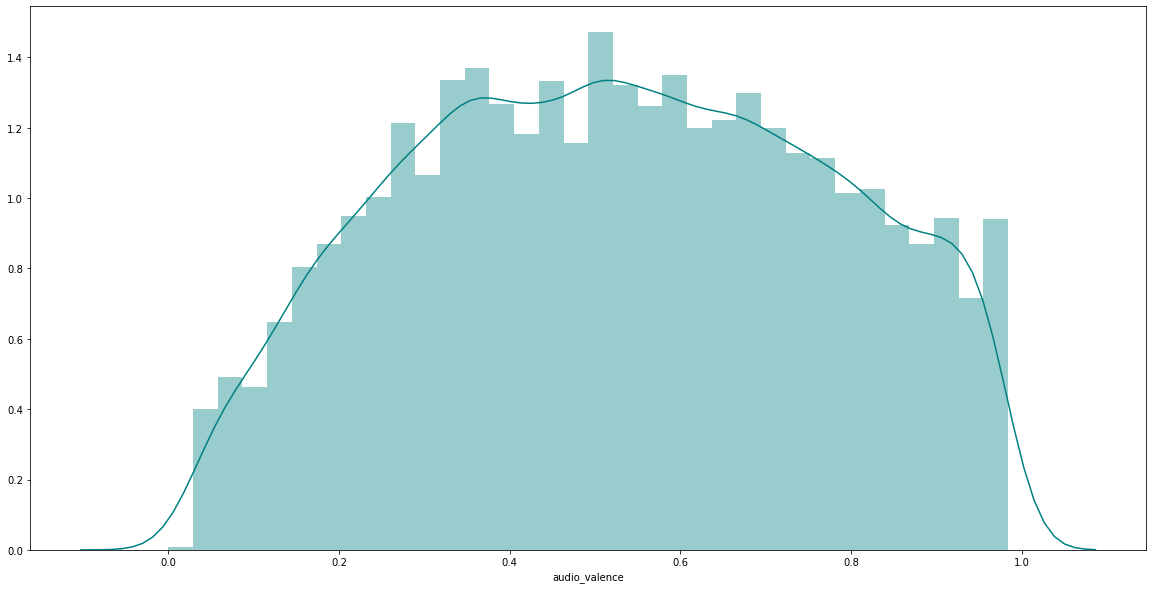

In [14]:
for i in data_col:
    plt.figure(figsize=(20,10))
    sns.distplot(data[i],color = 'Teal')

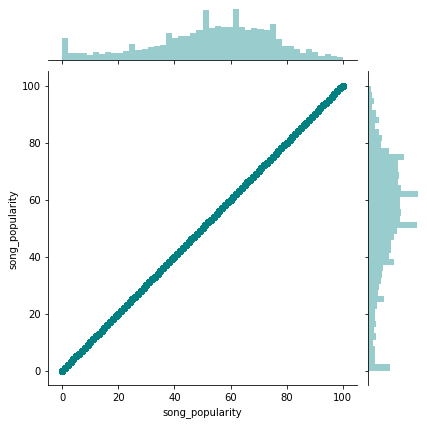

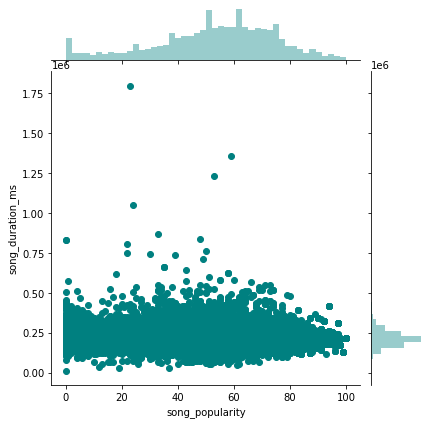

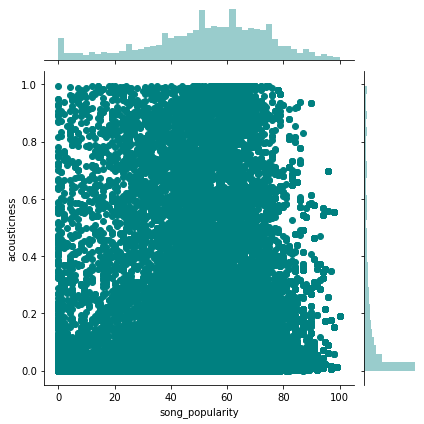

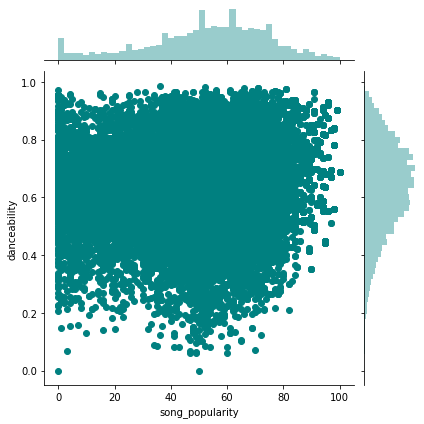

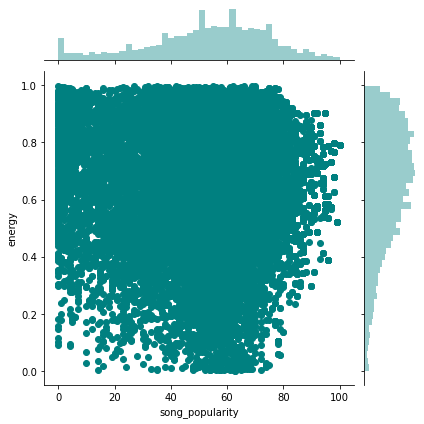

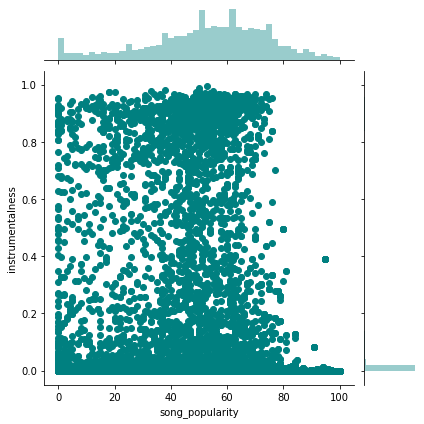

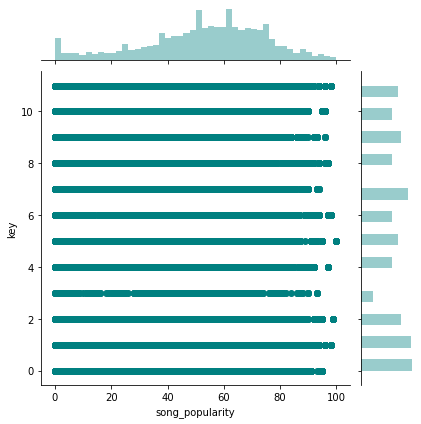

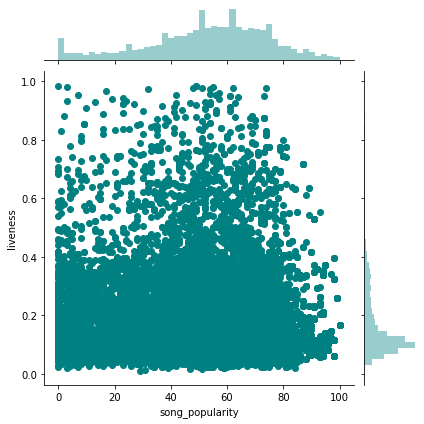

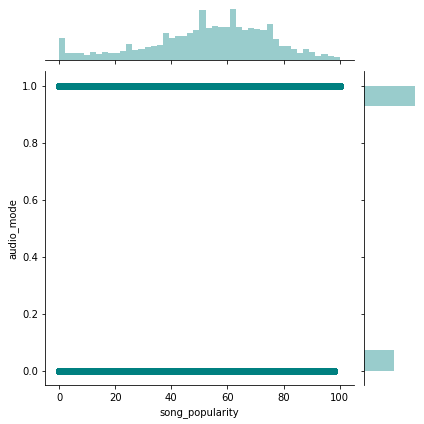

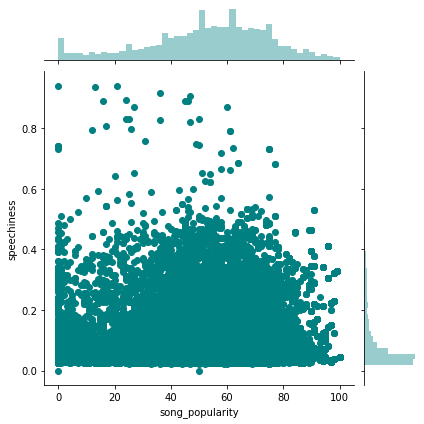

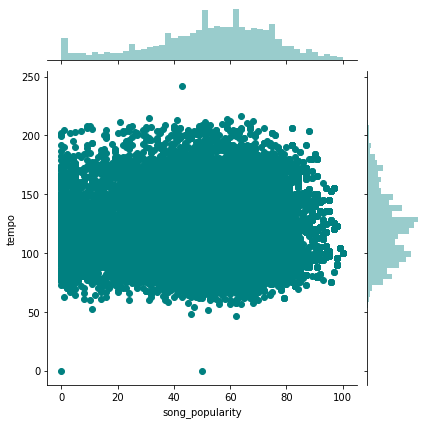

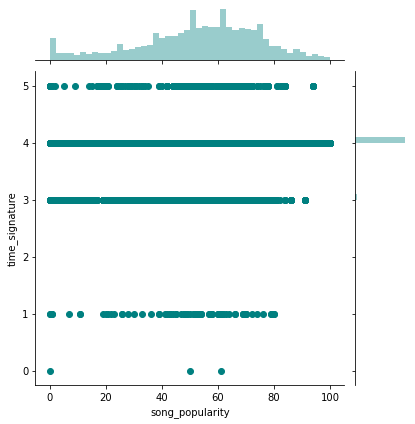

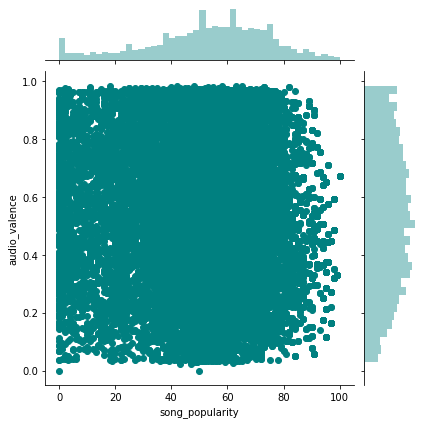

In [15]:
for i in data_col:
    #plt.figure(figsize=(20,10))
    sns.jointplot(data['song_popularity'],data[i],color='Teal')

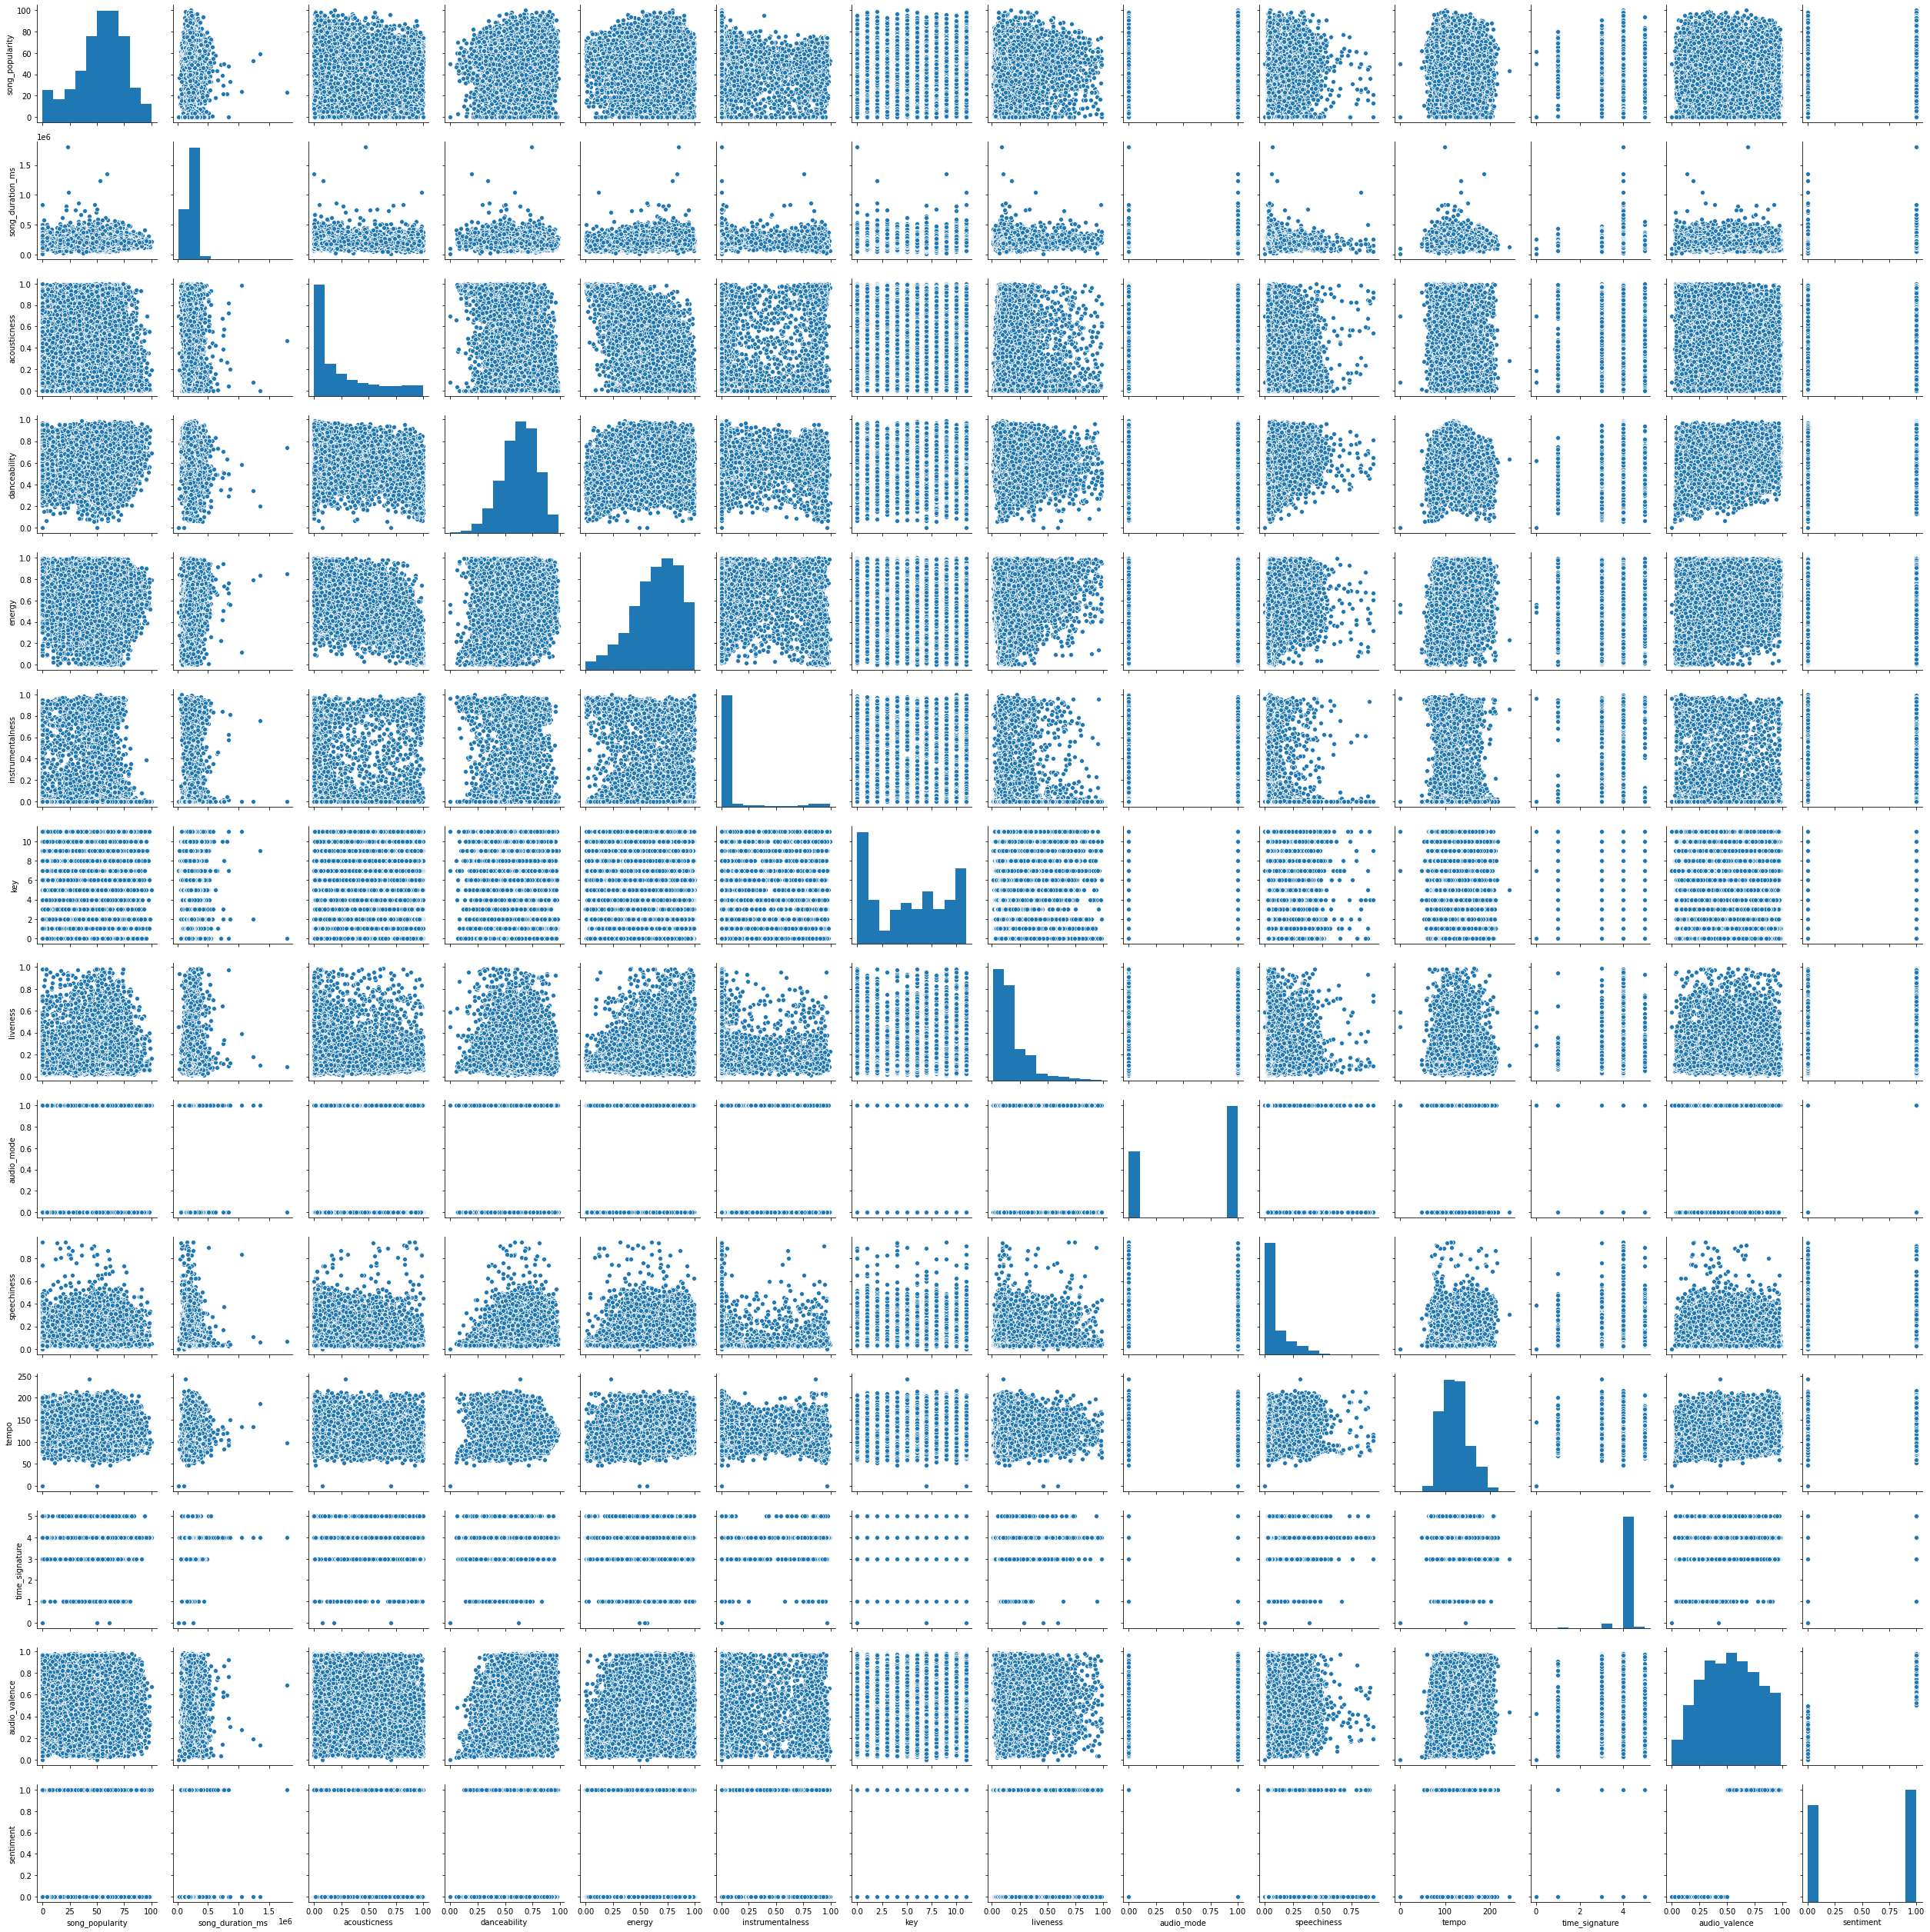

In [16]:
sns.pairplot(data)
plt.tight_layout()

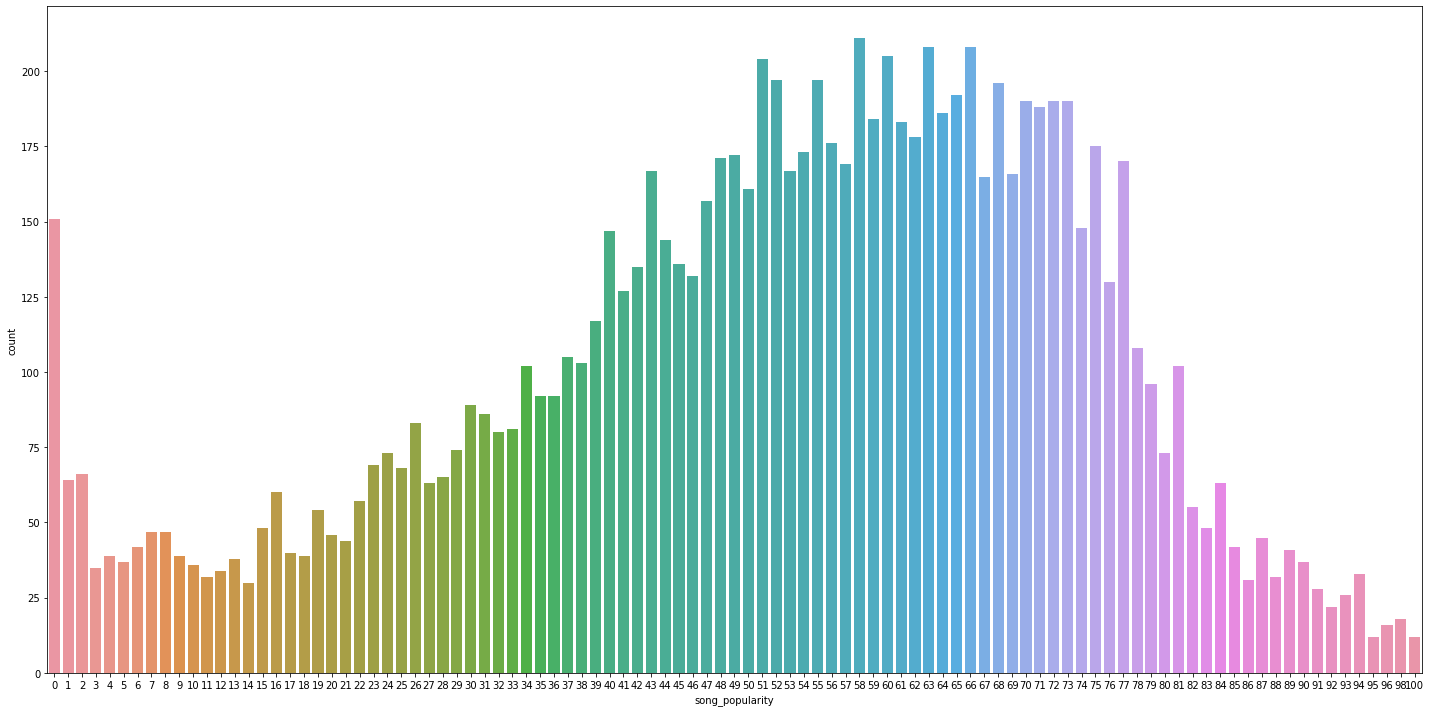

In [17]:
mood_group = data.groupby('sentiment')
get_happy = mood_group.get_group(1)
get_sad = mood_group.get_group(0)



plt.figure(figsize=(20,10))
sns.countplot(get_happy['song_popularity'])


plt.tight_layout()
plt.show()

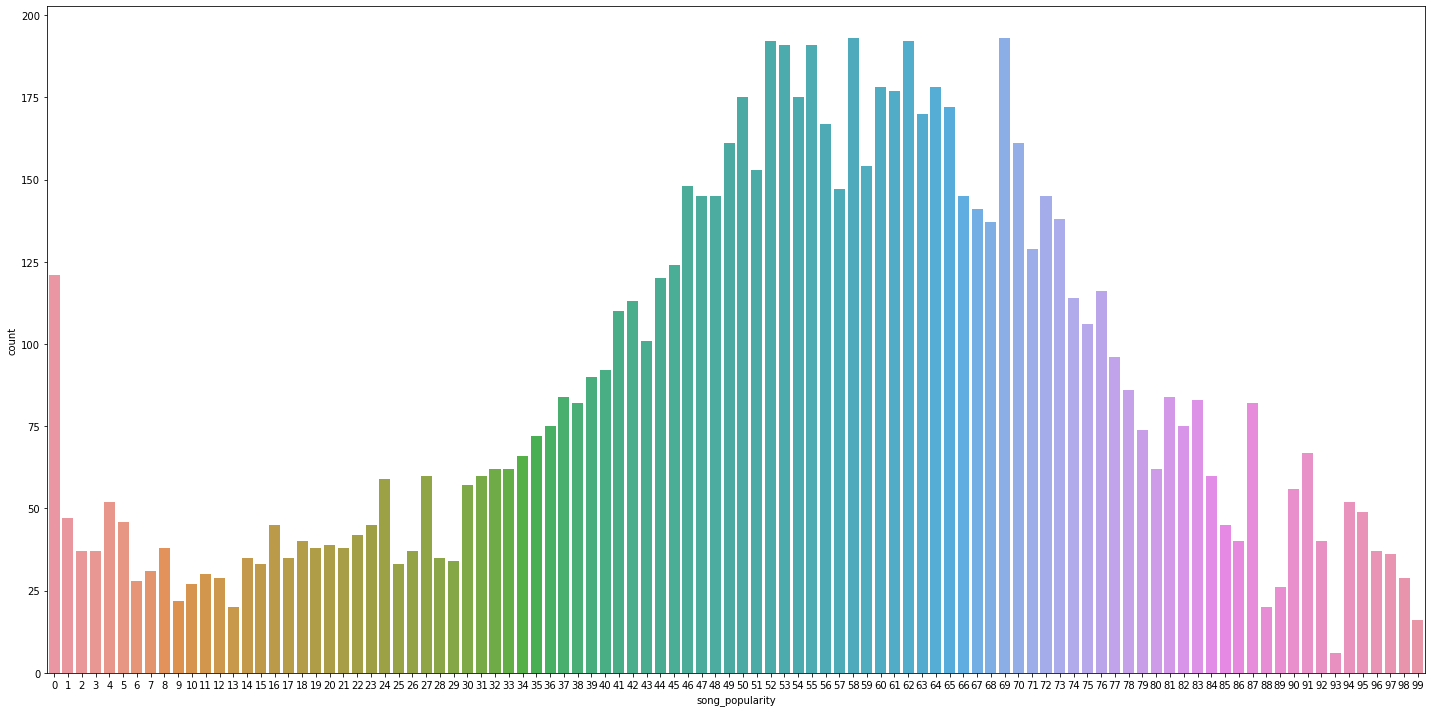

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(get_sad['song_popularity'])


plt.tight_layout()
plt.show()

# Predicting the sentiment

In [19]:
x = data.drop(['audio_valence','sentiment'],axis=1)
y = data['sentiment']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix,accuracy_score
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 23)

# Logistic Regression

In [22]:
Log_model= LogisticRegression().fit(x_train,y_train)

In [23]:
Logpred_train = Log_model.predict(x_train)
Logpred = Log_model.predict(x_test)

In [24]:
confusion_matrix(y_test,Logpred)

array([[   0, 1756],
       [   0, 2011]], dtype=int64)

In [25]:
accuracy_score(y_train,Logpred_train)

0.5369657552428989

In [26]:
accuracy_score(y_test,Logpred)

0.5338465622511283

# DecisionTree

In [27]:
tree = DecisionTreeClassifier().fit(x_train,y_train)

In [28]:
treepred_train = tree.predict(x_train)
treepred = tree.predict(x_test)

In [29]:
confusion_matrix(y_test,treepred)

array([[1284,  472],
       [ 476, 1535]], dtype=int64)

In [30]:
accuracy_score(y_train,treepred_train)

1.0

In [31]:
accuracy_score(y_test,treepred)

0.7483408547916114

# RandomForest

In [32]:
Rnd = RandomForestClassifier().fit(x_train,y_train)

In [33]:
Rndpredtrain = Rnd.predict(x_train)
Rndpred = Rnd.predict(x_test)

In [34]:
confusion_matrix(y_test,Rndpred)

array([[1341,  415],
       [ 328, 1683]], dtype=int64)

In [35]:
accuracy_score(y_train,Rndpredtrain)

1.0

In [36]:
accuracy_score(y_test,Rndpred)

0.8027608176267587

# SupportVectorMachine

In [37]:
Svm_model = svm.SVC(kernel='linear',gamma=2).fit(x_train,y_train)

In [38]:
svmpredtrain = Svm_model.predict(x_train)
svmpred = Svm_model.predict(x_test)

In [39]:
confusion_matrix(y_test,svmpred)

array([[ 395, 1361],
       [ 393, 1618]], dtype=int64)

In [40]:
accuracy_score(y_train,svmpredtrain)

0.5402840456596761

In [41]:
accuracy_score(svmpred,y_test)

0.5343774887178125

# KNearestNeighbors

In [42]:
knn_model = KNeighborsClassifier(n_neighbors=50).fit(x_train,y_train)

In [43]:
knnpred_train = knn_model.predict(x_train)
knnpred = knn_model.predict(x_test)

In [44]:
accuracy_score(y_train,knnpred_train)

0.5924475710114149

In [45]:
accuracy_score(y_test,knnpred)

0.556941863551898

In [46]:
confusion_matrix(y_test,knnpred)

array([[ 820,  936],
       [ 733, 1278]], dtype=int64)

# XGBOOST

In [47]:
xgboost = xgb.XGBClassifier().fit(x_train,y_train)

In [48]:
xgboosttrain_pred = xgboost.predict(x_train)
xgboost_pred = xgboost.predict(x_test)

In [49]:
accuracy_score(y_train,xgboosttrain_pred)

0.7462171489248739

In [50]:
accuracy_score(y_test,xgboost_pred)

0.7204672152906823

In [51]:
confusion_matrix(y_test,xgboost_pred)

array([[1115,  641],
       [ 412, 1599]], dtype=int64)

# Predicting the popularity of the data

In [52]:
data_spot.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [53]:
data_pop = data_spot

In [54]:
data_pop['popularity'] = [1 if i >80 else 0 for i in data_pop.song_popularity]

In [55]:
data_pop['popularity'].value_counts()

0    17269
1     1566
Name: popularity, dtype: int64

In [56]:
data_pop = data_spot.drop(['song_name','song_popularity','loudness'],axis = 1)

In [57]:
pop_columns = data_pop.drop('popularity',axis=1).columns

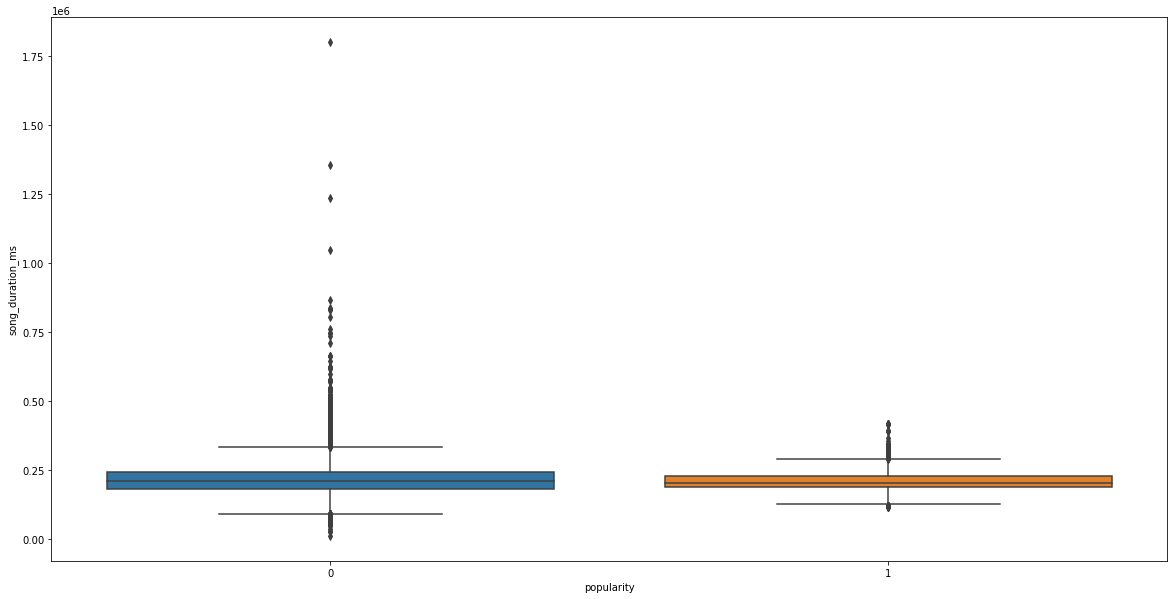

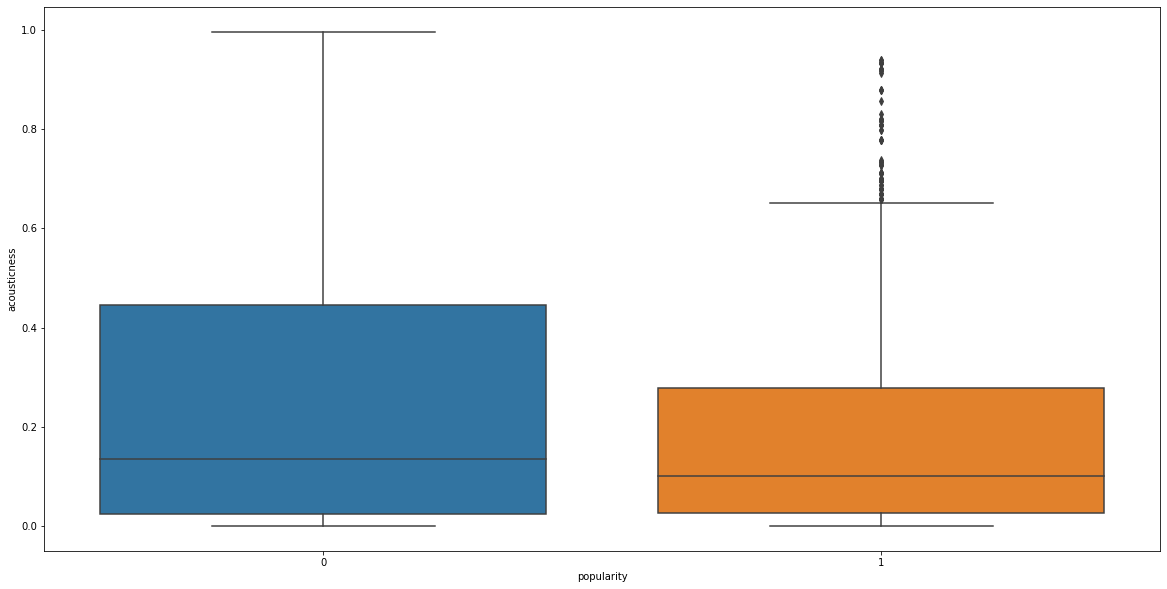

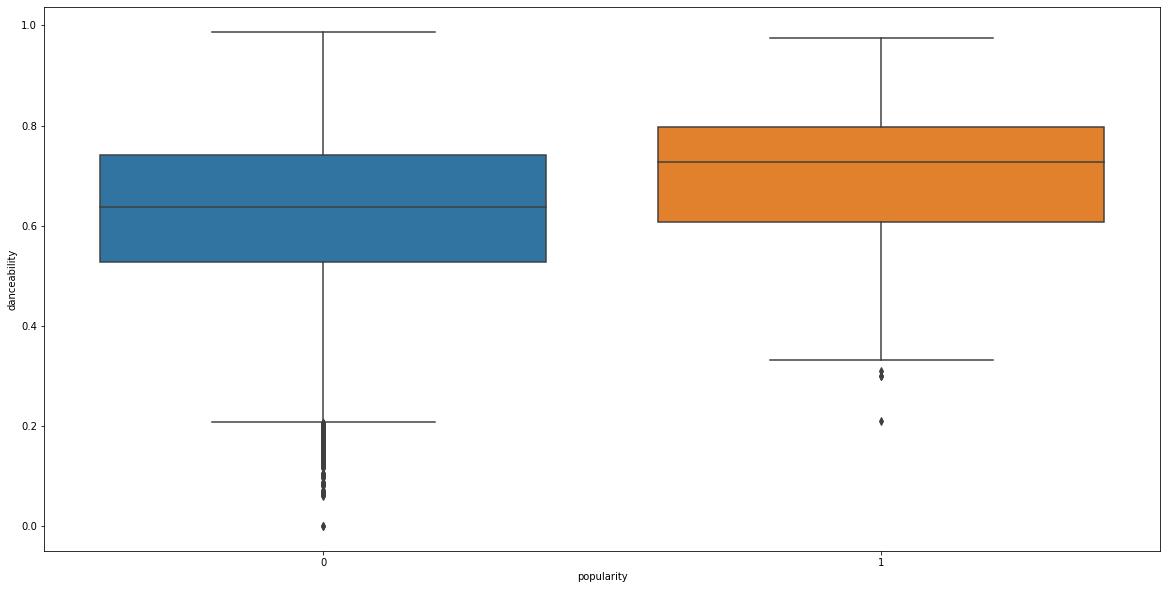

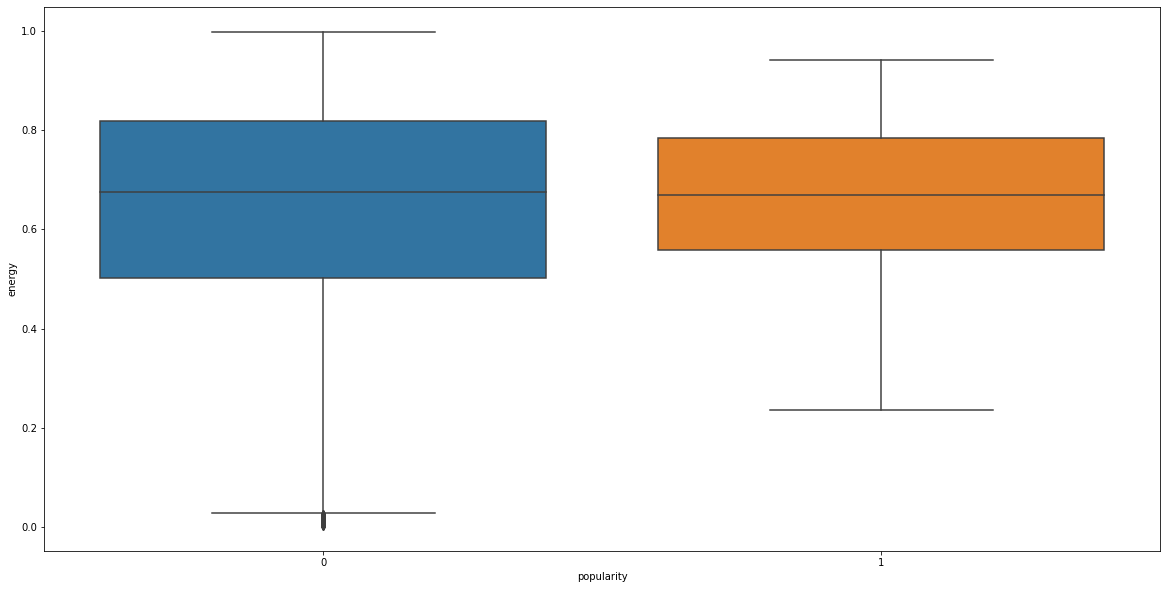

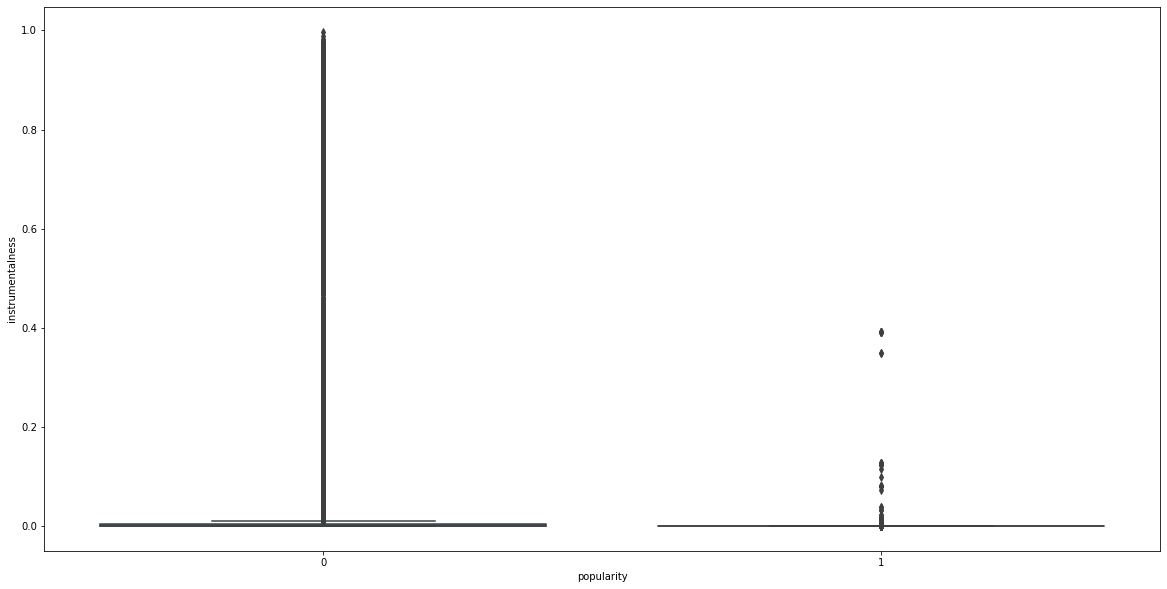

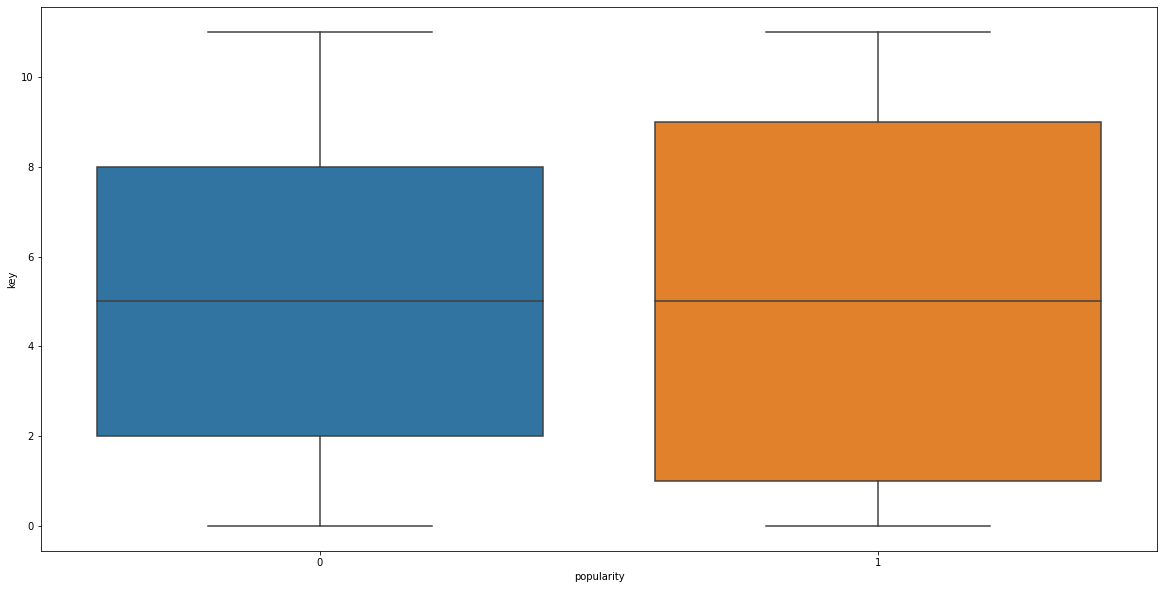

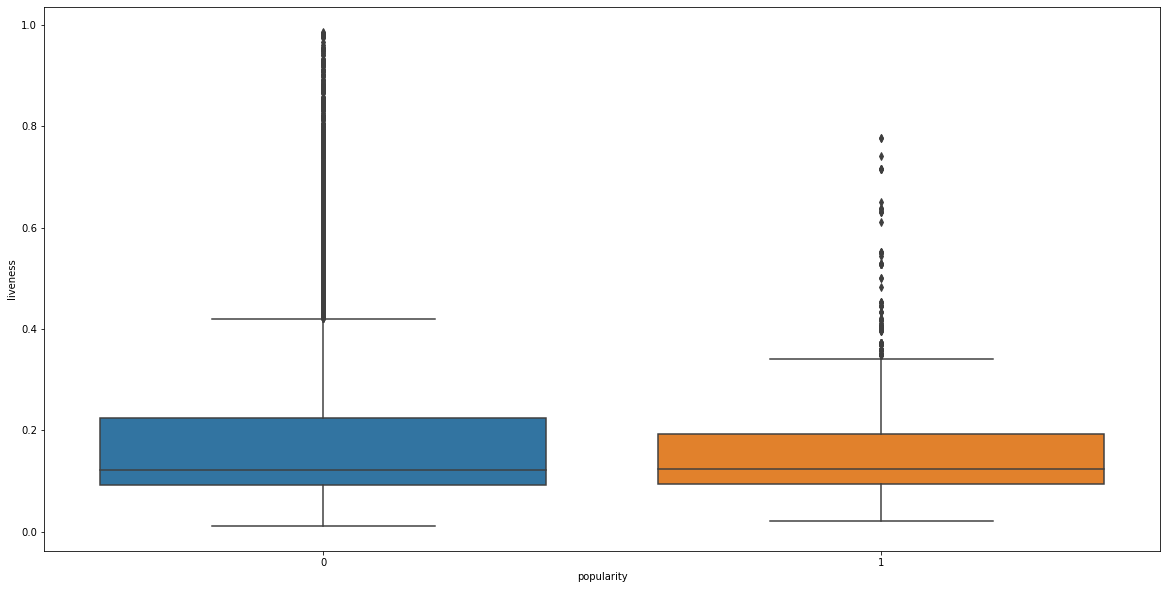

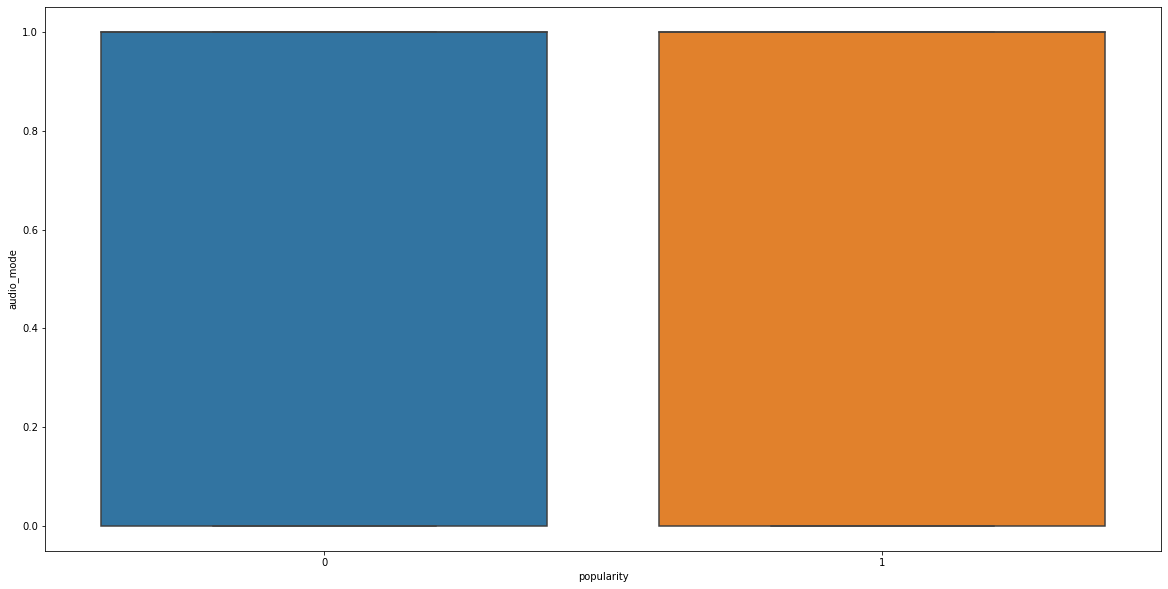

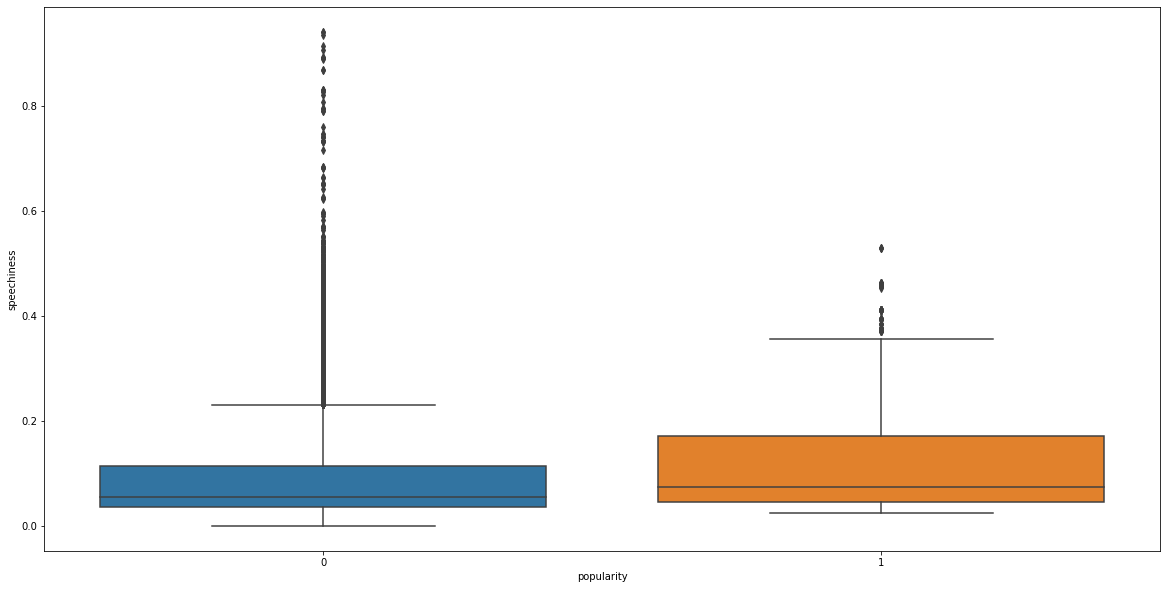

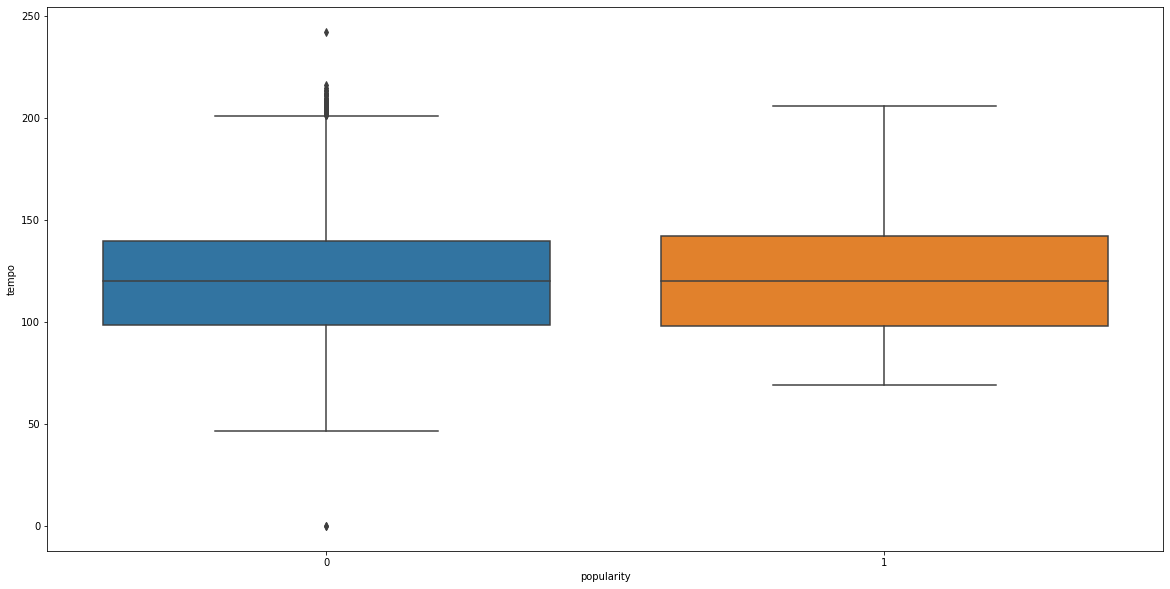

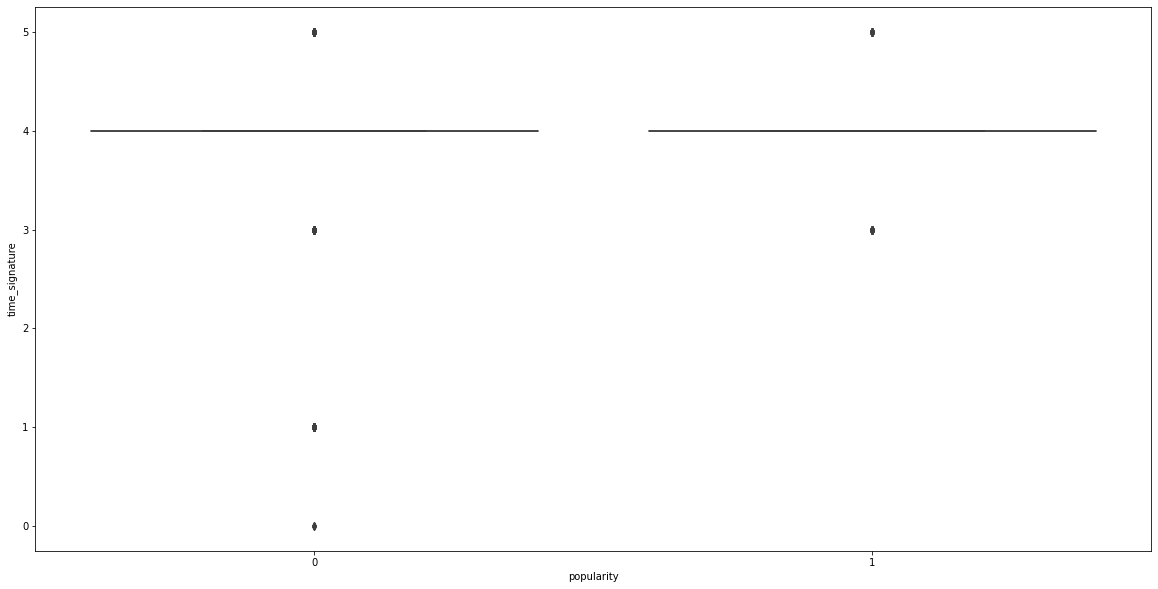

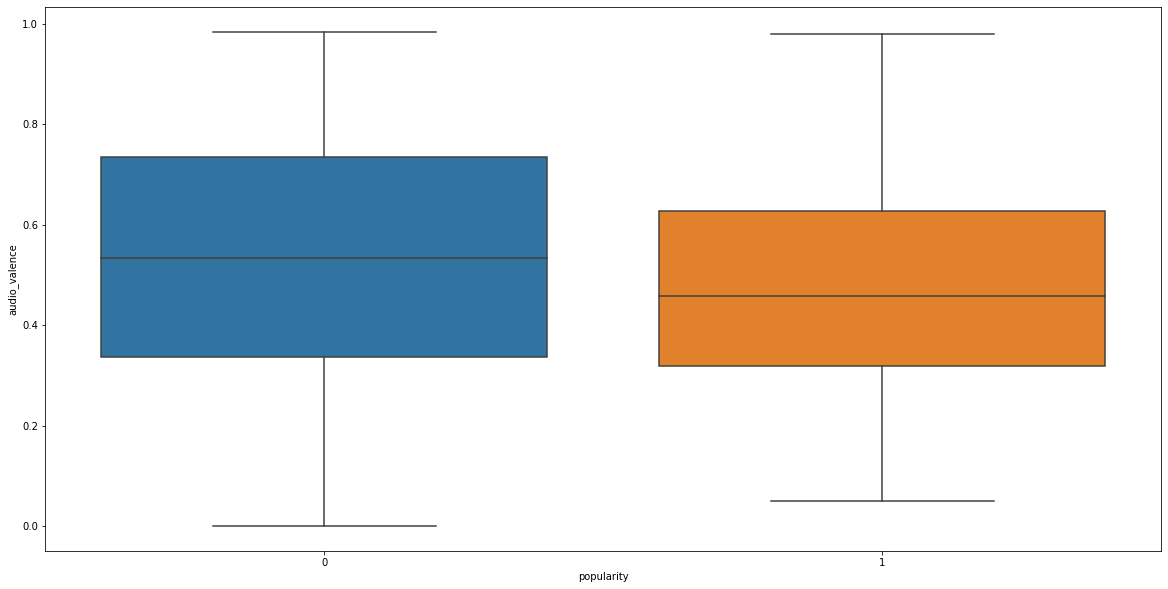

In [58]:
for i in pop_columns:
    plt.figure(figsize = (20,10))
    sns.boxplot(data_pop['popularity'],data_pop[i])

# Using SMOTE to balance the data

In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [60]:
X = data_pop.drop('popularity',axis=1)
Y=data_pop['popularity']

In [61]:
print(X.shape)
print(Y.shape)
print(format(sum(Y==1)))

print(format(sum(Y==0)))

(18835, 12)
(18835,)
1566
17269


In [62]:
sm = SMOTE(random_state = 123)
X_train_res,Y_train_res = sm.fit_sample(X,Y.ravel())

In [63]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res==0)))

After OverSampling, the shape of train_X: (34538, 12)
After OverSampling, the shape of train_y: (34538,) 

After OverSampling, counts of label '1': 17269
After OverSampling, counts of label '0': 17269


In [64]:
x_train,x_test,y_train,y_test = train_test_split(X_train_res,Y_train_res,test_size = 0.2,random_state = 12)

# now performing supervised learning

## Logistic regression

In [65]:
Log_model = LogisticRegression().fit(x_train,y_train)

In [66]:
log_predtrain = Log_model.predict(x_train)
log_pred = Log_model.predict(x_test)

In [67]:
accuracy_score(y_train,log_predtrain)

0.5102786825913862

In [68]:
accuracy_score(y_test,log_pred)

0.5096988998262884

In [69]:
confusion_matrix(y_test,log_pred)

array([[1913, 1570],
       [1817, 1608]], dtype=int64)

## USing desicion tree

In [70]:
tree_model = DecisionTreeClassifier().fit(x_train,y_train)
treepredtrain = tree_model.predict(x_train)
treepred = tree_model.predict(x_test)

In [71]:
accuracy_score(y_train,treepredtrain)

0.9986970684039088

In [72]:
accuracy_score(y_test,treepred)

0.9386218876664737

In [73]:
confusion_matrix(y_test,treepred)

array([[3221,  262],
       [ 162, 3263]], dtype=int64)

## Using Random Forest

In [74]:
RAnd_model = RandomForestClassifier().fit(x_train,y_train)
rndpredtrain = RAnd_model.predict(x_train)
rndpred = RAnd_model.predict(x_test)

In [75]:
accuracy_score(y_train,rndpredtrain)

0.9986970684039088

In [76]:
accuracy_score(y_test,rndpred)

0.980023161551824

In [77]:
confusion_matrix(y_test,rndpred)

array([[3437,   46],
       [  92, 3333]], dtype=int64)

## Using SVM

In [78]:
SVMmodel = svm.SVC().fit(x_train,y_train)
SVMpredtrain = SVMmodel.predict(x_train)
SVMpred = SVMmodel.predict(x_test)

In [79]:
accuracy_score(y_train,SVMpredtrain)

0.5369163952225842

In [80]:
accuracy_score(y_test,SVMpred)

0.5347423277359583

In [81]:
confusion_matrix(y_test,SVMpred)

array([[ 834, 2649],
       [ 565, 2860]], dtype=int64)

## Using KNN

In [82]:
KNNmodel = KNeighborsClassifier(n_neighbors = 3).fit(x_train,y_train)
KNNpredtrain = KNNmodel.predict(x_train)
KNNpred = KNNmodel.predict(x_test)

In [83]:
accuracy_score(y_train,KNNpredtrain)

0.952732537097358

In [84]:
accuracy_score(y_test,KNNpred)

0.9096699478865083

In [85]:
confusion_matrix(y_test,KNNpred)

array([[3101,  382],
       [ 242, 3183]], dtype=int64)

## Using XGBoost

In [86]:
XGBmodel = xgb.XGBClassifier().fit(x_train,y_train)
XGBpredtrain = XGBmodel.predict(x_train)
XGBpred = XGBmodel.predict(x_test)

In [87]:
accuracy_score(y_train,XGBpredtrain)

0.8315960912052117

In [88]:
accuracy_score(y_test,XGBpred)

0.8304863925883034

In [89]:
confusion_matrix(y_test,XGBpred)

array([[2590,  893],
       [ 278, 3147]], dtype=int64)